# AUTHOR
***Written by Ho Sy The***

Hanoi University of Science and Technology

IT1 04 - K65.

*Github: https://github.com/hsthe29*

- **date: 2022-05-16**

# SUMMARY
## Lagrangian dual problem
- Lagrangian dual function in Soft Margin Problem: $\begin{eqnarray}
     \lambda &=& \arg \max_{\lambda} \sum_{n=1}^N \lambda_n - \frac{1}{2} \sum_{n=1}^N\sum_{m=1}^N \lambda_n \lambda_m y_n y_m \mathbf{x}_n^T \mathbf{x}_m &&\ 
     \text{subject to:}~ && \sum_{n=1}^N \lambda_ny_n = 0 &&\quad\quad\quad\quad\ 
     && 0 \leq \lambda_n \leq C, ~\forall n= 1, 2, \dots, N 
 \end{eqnarray}$ 

- After found solution ($λ$), the class of x is calculated by this formula:
 $sign\left(\sum_{m \in \mathcal{S}} \lambda_m y_m \mathbf{x}_m^T \mathbf{x} + \frac{1}{N_{\mathcal{M}}} \sum_{n \in \mathcal{M}} \left(y_n - \sum_{m \in \mathcal{S}} \lambda_m y_m \mathbf{x}_m^T\mathbf{x}_n\right)\right)$

- We have to do several things in order to make data nearly linear separable.
 - Assume, $\mathbf{x} \in \mathbf{R}^{d_1}$ and function $\Phi(\mathbf{x}): \mathbf{x} \in \mathbf{R}^{d_1} → \mathbf{z} \in \mathbf{R}^{d_2}$

- So, in new space, we have new Lagrangian dual function:
  $\begin{eqnarray}
     \lambda &=& \arg \max_{\lambda} \sum_{n=1}^N \lambda_n - \frac{1}{2} \sum_{n=1}^N\sum_{m=1}^N \lambda_n \lambda_m y_n y_m \Phi(\mathbf{x}_n)^T \Phi(\mathbf{x}_m) &&\ 
     \text{subject to:}~ && \sum_{n=1}^N \lambda_ny_n = 0 &&\quad\quad\quad\quad\ 
     && 0 \leq \lambda_n \leq C, ~\forall n= 1, 2, \dots, N 
 \end{eqnarray}$
 - And label of each data point $\mathbf{x}$: 
 
 $~~~~~~~\mathbf{w}^T\Phi(\mathbf{x}) + b = \sum_{m \in \mathcal{S}} \lambda_m y_m \Phi(\mathbf{x}_m)^T \Phi(\mathbf{x}) + \frac{1}{N_{\mathcal{M}}} \sum_{n \in \mathcal{M}} \left(y_n - \sum_{m \in \mathcal{S}} \lambda_m y_m \Phi(\mathbf{x}_m)^T\Phi(\mathbf{x}_n)\right)~~~~~~~~~$

- Further more, let's define Kernel function: $k(\mathbf{x}, \mathbf{z}) = \Phi(\mathbf{x})^T\Phi(\mathbf{z})$. The Lagrangian dual function is written as follows:
$\begin{eqnarray}
    \lambda &=& \arg \max_{\lambda} \sum_{n=1}^N \lambda_n - \frac{1}{2} \sum_{n=1}^N\sum_{m=1}^N \lambda_n \lambda_m y_n y_m k(\mathbf{x}_n,\mathbf{x}_m) &&\ 
    \text{subject to:}~ && \sum_{n=1}^N \lambda_ny_n = 0 &&\quad\quad\quad\quad\ 
    && 0 \leq \lambda_n \leq C, ~\forall n= 1, 2, \dots, N &&
\end{eqnarray}$ and
$~~\sum_{m \in \mathcal{S}} \lambda_m y_m k(\mathbf{x}_m, \mathbf{x}) + \frac{1}{N_{\mathcal{M}}} \sum_{n \in \mathcal{M}} \left(y_n - \sum_{m \in \mathcal{S}} \lambda_m y_m k(\mathbf{x}_m, \mathbf{x}_n)\right)~~~~~~~~~$

## Kernel functions
### Features of Kernel funcions:
- Symmetric function: $k(\mathbf{x}, \mathbf{z}) = k(\mathbf{z}, \mathbf{x})$
- Kernel functions need to satisfy the Mercer condition:
  $~~~\sum_{n=1}^N \sum_{m=1}^N k(\mathbf{x}_m, \mathbf{x}_n) c_nc_m \geq 0, ~~ \forall c_i \in \mathbb{R}, i = 1, 2, \dots, N \quad \quad$
- If a kernel function satisfies the Mercer condition, let $c_n = y_n \lambda_n$:
  $~~~\lambda^T \mathbf{K} \lambda = \sum_{n=1}^N \sum_{m=1}^N k(\mathbf{x}_m, \mathbf{x}_n) y_ny_m \lambda_n \lambda_m \geq 0, ~\forall \lambda_n \quad\quad $
in which $\mathbf{K}$ is a symmetric matrix defined by $k_{nm} = y_ny_m k(\mathbf{x}_n, \mathbf{x}_m)$

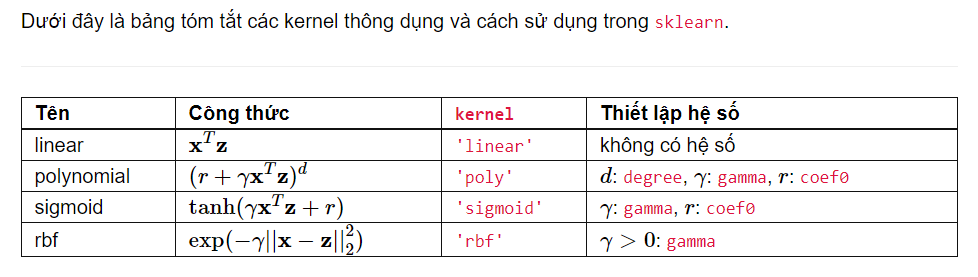

# Let's implement algorithm by using CVXOPT  library 
### As for Gradient Descent, I'll do it later :)

In [9]:
import numpy as np
from cvxopt import matrix, solvers
from scipy.spatial.distance import cdist
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
class KernelSVM: # Using CVXOPT
             
  def __init__(self, kernel='rbf', C=1e5, degree=3, gamma=0, coeff=0):
    self.__kernels = {'linear': lambda x, y: self.__linear(x, y),
             'poly': lambda x, y: self.__poly(x, y),
             'sigmoid': lambda x, y: self.__sigmoid(x, y),
             'rbf': lambda x, y: self.__rbf(x, y)}
    if kernel not in self.__kernels.keys():
      raise ValueError('kernel is not accepted!')
    self.__kernel= kernel
    self.__C = C
    self.__degree = degree
    self.__gamma = gamma
    self.__coeff = coeff
  
  def __linear(self, X1, X2): # X: [d, N]
    return X1.T @ X2 # [N, N]

  def __sigmoid(self, X1, X2): # X: [d, N]
    x = X1.T @ X2 # [N, N]
    return np.tanh(self.__gamma * x + self.__coeff)
  
  def __poly(self, X1, X2):
    x = X1.T @ X2 # [N, N]
    return (self.__gamma * x + self.__coeff) ** self.__degree

  def __rbf(self, X1, X2):
    d, n = X1.shape
    _, n2 = X2.shape
    X1_ = X1.reshape(d, n, 1)
    X2_ = X2.reshape(d, n2, 1)
    one1 = np.ones((d, 1, n))
    one2 = np.ones((d, 1, n2))
    ans = (X1_ @ one2 - (X2_ @ one1).transpose(0, 2, 1)) ** 2 
    return np.exp(-self.__gamma * np.sum(ans, axis=0))
  
  def fit(self, X, y, show_progress=False):
    self.classes = np.unique(y)
    if len(self.classes) != 2:
      raise ValueError('Number of classed must be 2!')

    self.X = X
    self.y = y
    self.y[self.y == self.classes[0]] = -1
    self.y[self.y == self.classes[1]] = 1

    L = y.reshape((1, -1))
    T = L.T @ L
    V = self.__kernels[self.__kernel](X, X)
    Q = matrix(T * V)
    p = matrix(-np.ones((X.shape[1], 1)))

    G = matrix(np.vstack((-np.eye(X.shape[1]), np.eye(X.shape[1]))))
    h = matrix(np.vstack((np.zeros((X.shape[1], 1)), self.__C * np.ones((X.shape[1], 1)))))
    A = matrix(y)
    b = matrix(0.0)

    solvers.options['show_progress'] = show_progress
    sol = solvers.qp(Q, p, G, h, A, b)  

    l = np.array(sol['x'])
    self.lambda_ = l

    self.S_ = np.where(l > 1e-5)[0]
    temp_S = np.where(l < 0.999 * self.__C)[0]
    self.M_ = [i for i in self.S_ if i in temp_S]

    self.b_ = self.y[:, self.M_] - (self.lambda_[self.S_].T * self.y[:, self.S_])\
          .dot(self.__kernels[self.__kernel](self.X[:, self.S_], self.X[:, self.M_]))\
          if len(self.M_) > 0 else 0.0

  def decision_function(self, X):
    # [1, ns] x [ns, n]
    w_t = (self.lambda_[self.S_].T * self.y[:, self.S_])\
          .dot(self.__kernels[self.__kernel](self.X[:, self.S_], X))
    #         [nm, 1] - [1, nm]
    

    return w_t + np.mean(self.b_)
  
  def predict(self, X, keepclass=False): # X: [2, 400]
    ans = np.sign(self.decision_function(X))
    if keepclass:
      ans[ans == -1] = self.classes[0]
      ans[ans == 1] = self.classes[1]
    return ans

  def visualize(self, x_axis, y_axis, n_=500, level_sets=200, dpi=100):
    plt.figure(dpi=dpi)

    x_ = np.linspace(x_axis[0], x_axis[1], n_)
    y_ = np.linspace(y_axis[0], y_axis[1], n_)
    l = len(x_)
    x_, y_ = np.meshgrid(x_, y_)

    xx = x_.reshape(-1)
    yy = y_.reshape(-1)
    x = np.vstack((xx, yy))
    z = self.decision_function(x)
    z = z.reshape(l, l)

    plt.contourf(x_, y_, np.sign(z), level_sets, cmap='jet', alpha = .3)
    X_1 = self.X[:, self.y[0] == -1]
    X_2 = self.X[:, self.y[0] == 1]
    plt.plot(X_1[0], X_1[1], 'ro', markersize=8, markeredgecolor='k')
    plt.plot(X_2[0], X_2[1], 'bs', markersize=8, markeredgecolor='k')
    plt.axis('tight')

    plt.contour(x_, y_, z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.show()


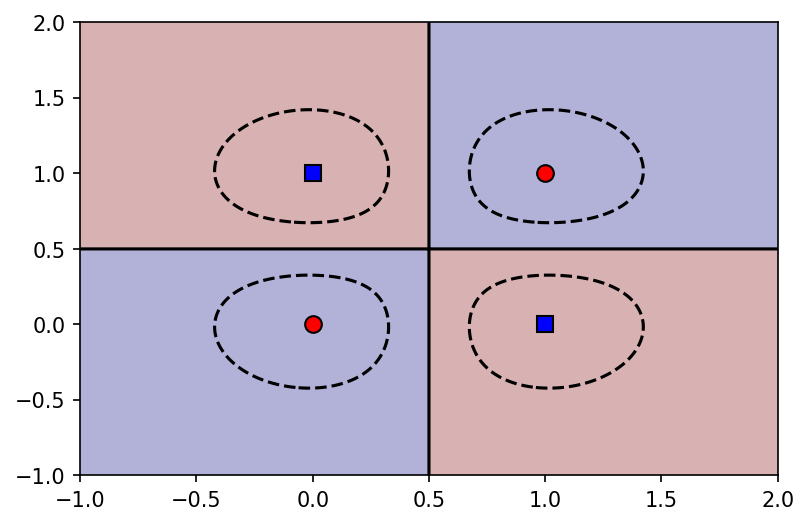

In [3]:
X = np.array([[0, 0],
             [0, 1],
             [1, 0],
             [1, 1]], dtype='float64').T
y = np.array([[0, 1, 1, 0]], dtype='float64')

ksvm = KernelSVM(kernel='rbf', C = 1000,degree=3, gamma=4)

ksvm.fit(X, y, show_progress=False)
ksvm.visualize([-1, 2], [-1, 2], dpi=150)

In [4]:
print(ksvm.predict(X, keepclass=False))

[[-1.  1.  1. -1.]]


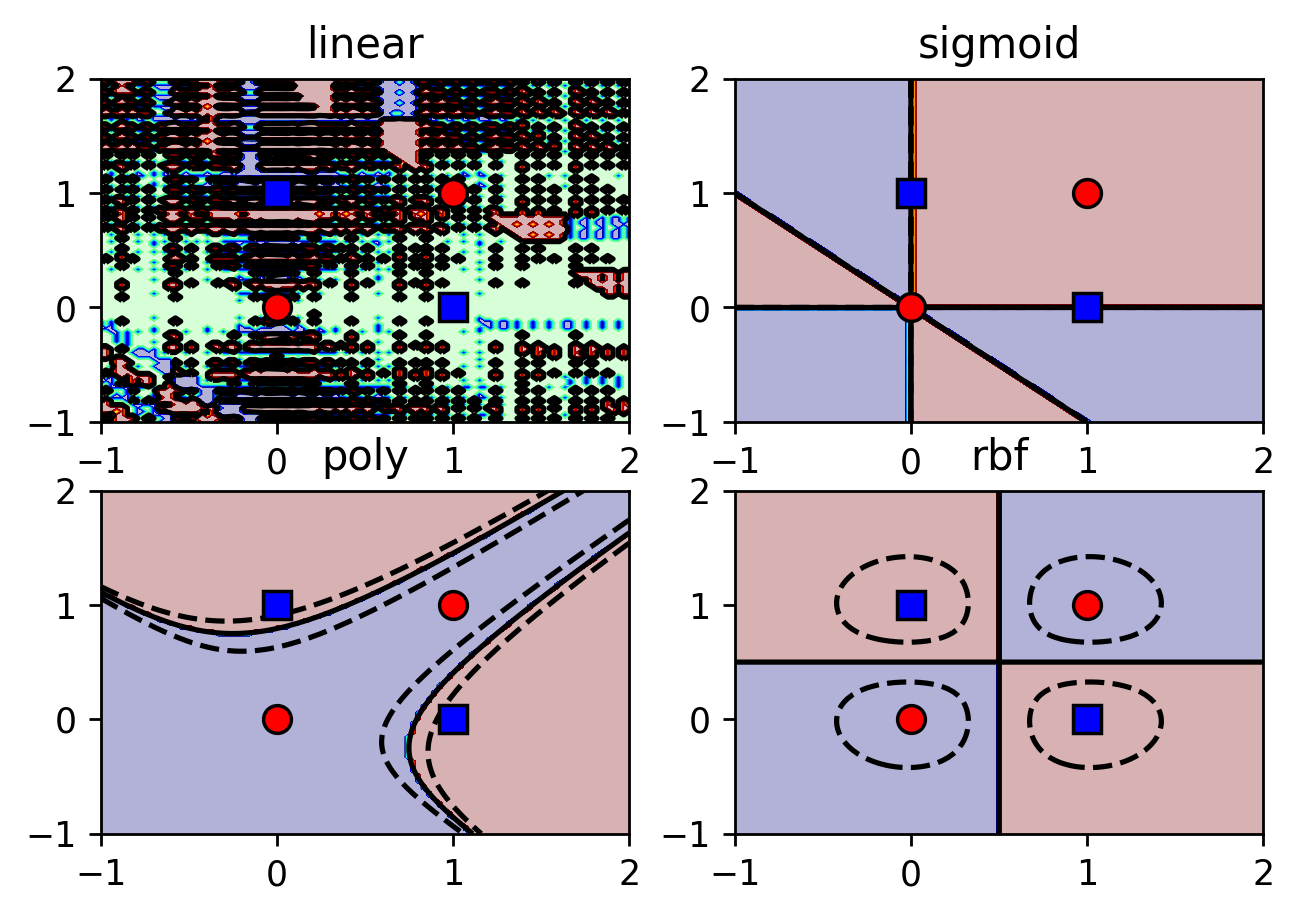

In [5]:
X1 = np.array([[0, 0],
             [0, 1],
             [1, 0],
             [1, 1]], dtype='float64').T
y1 = np.array([[-1, 1, 1, -1]], dtype='float64')

def plot_kernels(x_axis, y_axis, n_=500, level_sets=200, dpi=100):

  type_kernel = (('linear', [0, 0]), ('sigmoid', [0, 1]), ('poly', [1, 0]), ('rbf', [1, 1]))

  x_ = np.linspace(x_axis[0], x_axis[1], n_)
  y_ = np.linspace(y_axis[0], y_axis[1], n_)
  l = len(x_)
  x_, y_ = np.meshgrid(x_, y_)

  xx = x_.reshape(-1)
  yy = y_.reshape(-1)
  x = np.vstack((xx, yy))

  fig, axs = plt.subplots(2, 2, dpi=dpi)

  for pl in type_kernel:
    index = pl[1]
    svm = KernelSVM(kernel=pl[0], gamma=4)
    svm.fit(X1, y1)

    z = svm.decision_function(x)
    z = z.reshape(l, l)

    axs[index[0], index[1]].contourf(x_, y_, np.sign(z), level_sets, cmap='jet', alpha = .3)
    X_1 = svm.X[:, svm.y[0] == -1]
    X_2 = svm.X[:, svm.y[0] == 1]
    axs[index[0], index[1]].plot(X_1[0], X_1[1], 'ro', markersize=8, markeredgecolor='k')
    axs[index[0], index[1]].plot(X_2[0], X_2[1], 'bs', markersize=8, markeredgecolor='k')
    axs[index[0], index[1]].axis('tight')

    axs[index[0], index[1]].contour(x_, y_, z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    axs[index[0], index[1]].set_title(pl[0])
  plt.show()


plot_kernels([-1, 2], [-1, 2],n_=100, dpi=250)

# Another dataset

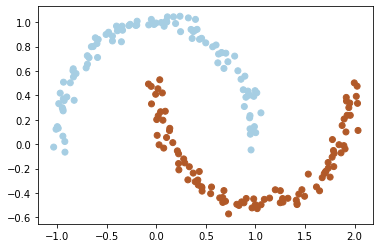

In [6]:
def make_data(n_samples, noise=0.05):
  noisy_moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=6)
  return noisy_moons[0], noisy_moons[1]


n_data = 200
X2, y2 = make_data(n_data)
X2 = X2.T
y2 = y2.reshape(1, n_data)

y2 = y2.astype(float)

plt.scatter(X2[0], X2[1],c=y2, cmap=plt.cm.Paired)
plt.show()

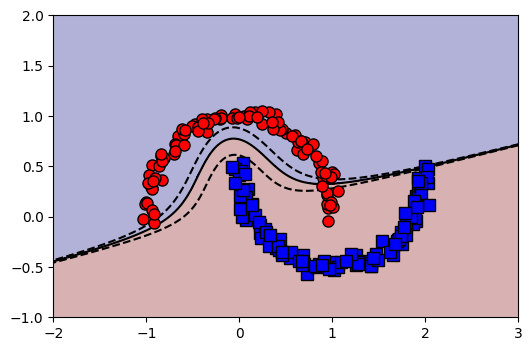

In [7]:
ksvm2 = KernelSVM(kernel='poly', gamma=4)

ksvm2.fit(X2, y2)

ksvm2.visualize([-2, 3], [-1, 2])

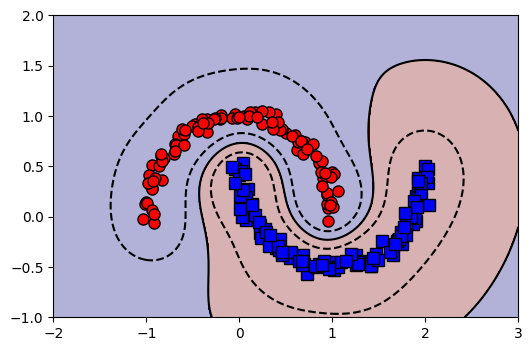

In [20]:
ksvm3 = KernelSVM(kernel='rbf', gamma=4)

ksvm3.fit(X2, y2)

ksvm3.visualize([-2, 3], [-1, 2])

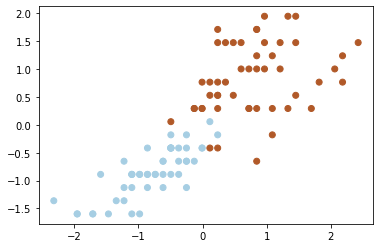

In [17]:
def load_data(cols):
  iris = sns.load_dataset("iris")
  iris = iris.tail(100)

  le = preprocessing.LabelEncoder()
  yt = le.fit_transform(iris["species"])

  Xt = iris.drop(["species"], axis=1)

  if len(cols) > 0:
    Xt = Xt[cols]

  return Xt.values, yt

cols = ["petal_length", "petal_width"]
X3, y3 = load_data(cols)

y3[y3 == 0] = -1
y3 = np.array([y3])
y3 = y3.astype(float)

# scale the data
scaler = StandardScaler()
X3 = scaler.fit_transform(X3)
X3 = X3.T

plt.scatter(X3[0], X3[1],c=y3, cmap=plt.cm.Paired)
plt.show()

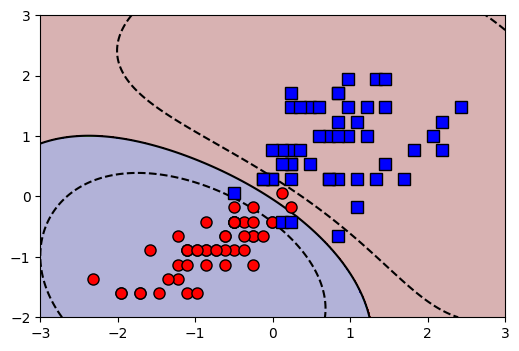

In [38]:
ksvm_1 = KernelSVM(kernel='rbf', C=1, gamma=.2)

ksvm_1.fit(X3, y3)

ksvm_1.visualize([-3, 3], [-2, 3])

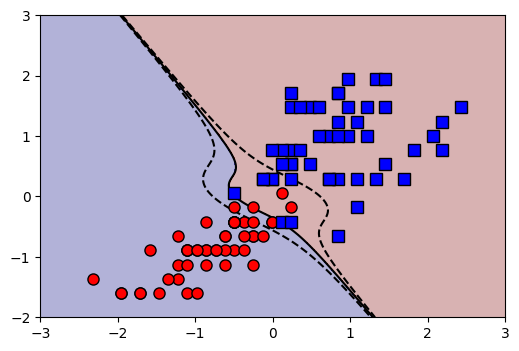

In [51]:
ksvm_2 = KernelSVM(kernel='poly', C=10, gamma=1)

ksvm_2.fit(X3, y3)

ksvm_2.visualize([-3, 3], [-2, 3])